<a href="https://colab.research.google.com/github/Guptasrijal0901/Robot-and-Trailer/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Position: x=0.99, y=0.01, Heading=0.01, Estimated=0.99, Actual=1.00
Position: x=1.99, y=0.05, Heading=0.04, Estimated=1.99, Actual=2.00
Position: x=2.99, y=0.15, Heading=0.10, Estimated=3.00, Actual=3.00
Position: x=3.98, y=0.24, Heading=0.09, Estimated=3.99, Actual=4.00
Position: x=5.00, y=0.34, Heading=0.10, Estimated=5.02, Actual=5.00
Position: x=5.96, y=0.43, Heading=0.10, Estimated=5.98, Actual=6.00
Position: x=6.97, y=0.55, Heading=0.11, Estimated=7.00, Actual=7.00
Position: x=7.98, y=0.63, Heading=0.09, Estimated=8.00, Actual=8.00
Position: x=8.98, y=0.72, Heading=0.08, Estimated=9.01, Actual=9.00
Position: x=9.97, y=0.79, Heading=0.07, Estimated=10.00, Actual=10.00
Position: x=10.97, y=0.87, Heading=0.08, Estimated=11.01, Actual=11.00
Position: x=12.00, y=0.96, Heading=0.09, Estimated=12.04, Actual=12.00
Position: x=12.99, y=1.06, Heading=0.11, Estimated=13.04, Actual=13.00
Position: x=13.99, y=1.15, Heading=0.09, Estimated=14.04, Actual=14.00
Position: x=14.99, y=1.24, Heading

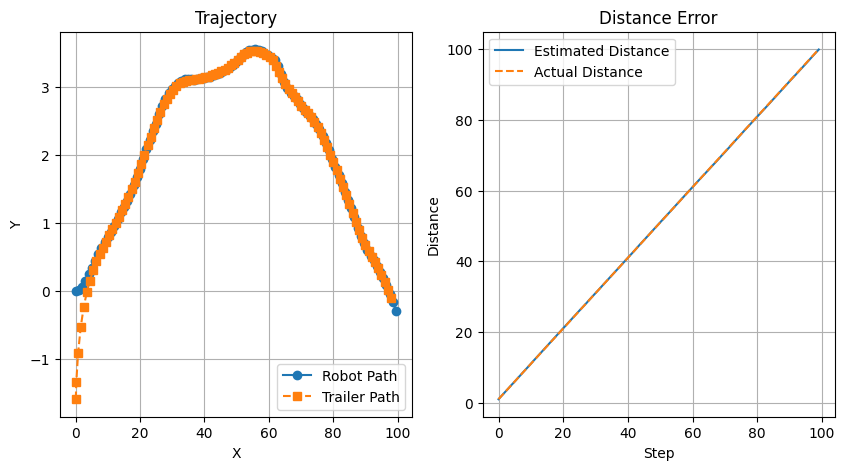

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class ProximitySensor:
    """
    Simulates a proximity sensor with Gaussian noise.
    """
    def __init__(self, position_offset, noise_level=0.02):
        self.position_offset = position_offset
        self.noise_level = noise_level
        self.measured_value = 0

    def sense_distance(self, actual_distance):
        """Measure distance with added noise."""
        self.measured_value = actual_distance + np.random.normal(0, self.noise_level)

class Trailer:
    """
    Models a trailer towed behind the robot.
    """
    def __init__(self, hitch_length=1.6):
        self.hitch_length = hitch_length
        self.position_x = 0
        self.position_y = -hitch_length
        self.orientation_angle = 0

    def update_position(self, robot_x, robot_y, robot_heading):
        """Update the trailer's position and orientation."""
        tow_angle = np.arctan2(robot_y - self.position_y, robot_x - self.position_x)
        self.orientation_angle = tow_angle
        self.position_x = robot_x - self.hitch_length * np.cos(self.orientation_angle)
        self.position_y = robot_y - self.hitch_length * np.sin(self.orientation_angle)
        return self.position_x, self.position_y, self.orientation_angle

class Robot:
    """
    Simulates a robot with two proximity sensors and a towed trailer.
    """
    def __init__(self, position_x=0, position_y=0, heading_angle=0, step_size=1.0, sensor_spacing=0.6, wheel_spacing=1.2):
        self.position_x = position_x
        self.position_y = position_y
        self.heading_angle = heading_angle
        self.step_size = step_size
        self.wheel_spacing = wheel_spacing
        self.left_proximity_sensor = ProximitySensor(-sensor_spacing)
        self.right_proximity_sensor = ProximitySensor(sensor_spacing)
        self.trailer = Trailer()
        self.estimated_distance_traveled = 0
        self.actual_distance_traveled = 0

    def collect_sensor_data(self):
        """Simulate sensor measurements."""
        travel_distance = self.step_size
        self.left_proximity_sensor.sense_distance(travel_distance)
        self.right_proximity_sensor.sense_distance(travel_distance)

    def estimate_travel_distance(self):
        """Estimate movement based on sensor readings."""
        left_sensor_reading = self.left_proximity_sensor.measured_value
        right_sensor_reading = self.right_proximity_sensor.measured_value
        avg_travel_distance = (left_sensor_reading + right_sensor_reading) / 2
        self.estimated_distance_traveled += avg_travel_distance
        return avg_travel_distance

    def update_position(self):
        """Estimate new position based on motion model."""
        left_sensor_reading = self.left_proximity_sensor.measured_value
        right_sensor_reading = self.right_proximity_sensor.measured_value
        travel_distance = (left_sensor_reading + right_sensor_reading) / 2
        heading_change = (right_sensor_reading - left_sensor_reading) / self.wheel_spacing

        self.heading_angle += heading_change
        self.position_x += travel_distance * np.cos(self.heading_angle)
        self.position_y += travel_distance * np.sin(self.heading_angle)

        # Update trailer position
        self.trailer.update_position(self.position_x, self.position_y, self.heading_angle)

    def move(self):
        """Run one complete step cycle."""
        self.collect_sensor_data()
        self.estimate_travel_distance()
        self.update_position()
        self.actual_distance_traveled += self.step_size
        print(f"Position: x={self.position_x:.2f}, y={self.position_y:.2f}, Heading={self.heading_angle:.2f}, Estimated={self.estimated_distance_traveled:.2f}, Actual={self.actual_distance_traveled:.2f}")

# Initialize and simulate
robot = Robot()
robot_trajectory = [(robot.position_x, robot.position_y)]
trailer_trajectory = [(robot.trailer.position_x, robot.trailer.position_y, robot.trailer.orientation_angle)]
estimated_distances = []
actual_distances = []

for _ in range(100):
    robot.move()
    robot_trajectory.append((robot.position_x, robot.position_y))
    trailer_trajectory.append((robot.trailer.position_x, robot.trailer.position_y, robot.trailer.orientation_angle))
    estimated_distances.append(robot.estimated_distance_traveled)
    actual_distances.append(robot.actual_distance_traveled)

# Compute errors
distance_errors = np.array(estimated_distances) - np.array(actual_distances)
mean_absolute_error = np.mean(np.abs(distance_errors))
root_mean_squared_error = np.sqrt(np.mean(distance_errors**2))
print(f"MAE: {mean_absolute_error:.4f}, RMSE: {root_mean_squared_error:.4f}")

# Plot results
robot_trajectory = np.array(robot_trajectory)
trailer_trajectory = np.array(trailer_trajectory)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(robot_trajectory[:, 0], robot_trajectory[:, 1], marker='o', label='Robot Path')
plt.plot(trailer_trajectory[:, 0], trailer_trajectory[:, 1], marker='s', linestyle='dashed', label='Trailer Path')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(len(estimated_distances)), estimated_distances, label='Estimated Distance')
plt.plot(range(len(actual_distances)), actual_distances, linestyle='dashed', label='Actual Distance')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.title('Distance Error')
plt.legend()
plt.grid()

plt.show()
